In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
customer_df = joblib.load("../artifacts/customer_raw.pkl")
features = joblib.load("../artifacts/customer_features.pkl")

customer_df.head()


,CustomerID,Recency,Frequency,MonetaryValue,TotalQuantity
0,12346.0,325,1,77183.60,74215
1,12347.0,1,7,4310.00,2458
2,12348.0,74,4,1797.24,2341
3,12349.0,18,1,1757.55,631
4,12350.0,309,1,334.40,197


In [3]:
print("Shape:", customer_df.shape)
customer_df.describe()


Shape: (4338, 5)


,CustomerID,Recency,Frequency,MonetaryValue,TotalQuantity
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,91.536422,4.272015,2054.266460,1191.289073
std,1721.808492,100.014169,7.697998,8989.230441,5046.081546
min,12346.000000,0.000000,1.000000,3.750000,1.000000
25%,13813.250000,17.000000,1.000000,307.415000,160.000000
50%,15299.500000,50.000000,2.000000,674.485000,379.000000
75%,16778.750000,141.000000,5.000000,1661.740000,992.750000
max,18287.000000,373.000000,209.000000,280206.020000,196915.000000


Distribution of Recency

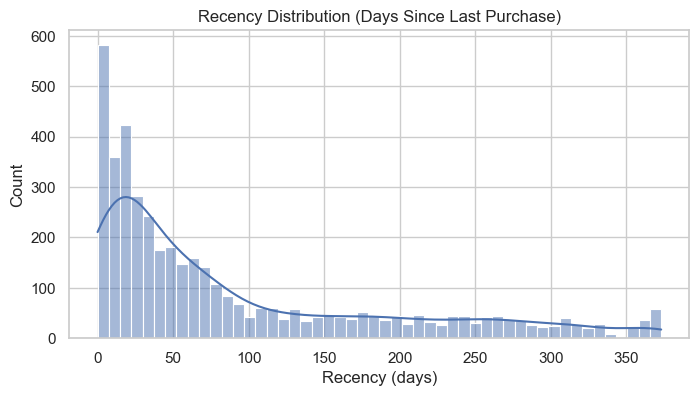

In [4]:
plt.figure(figsize=(8,4))
sns.histplot(customer_df["Recency"], bins=50, kde=True)
plt.title("Recency Distribution (Days Since Last Purchase)")
plt.xlabel("Recency (days)")
plt.show()


Distribution of Frequency

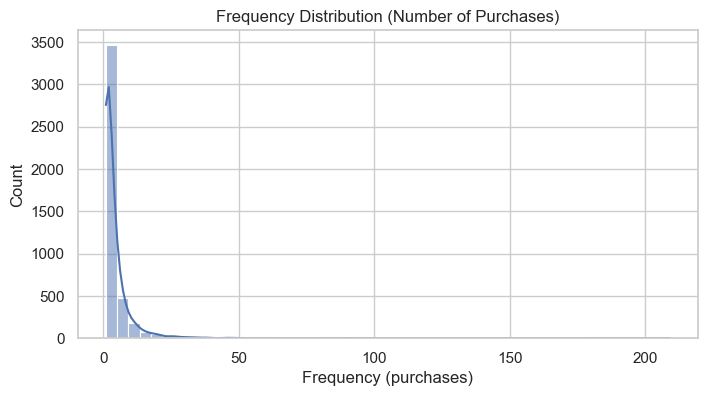

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(customer_df["Frequency"], bins=50, kde=True)
plt.title("Frequency Distribution (Number of Purchases)")
plt.xlabel("Frequency (purchases)")
plt.show()

Distribution of Monetary Value

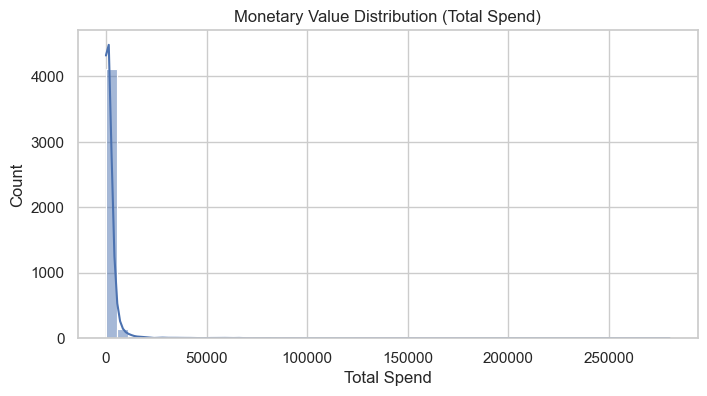

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(customer_df["MonetaryValue"], bins=50, kde=True)
plt.title("Monetary Value Distribution (Total Spend)")
plt.xlabel("Total Spend")
plt.show()


Pairwise Relationships

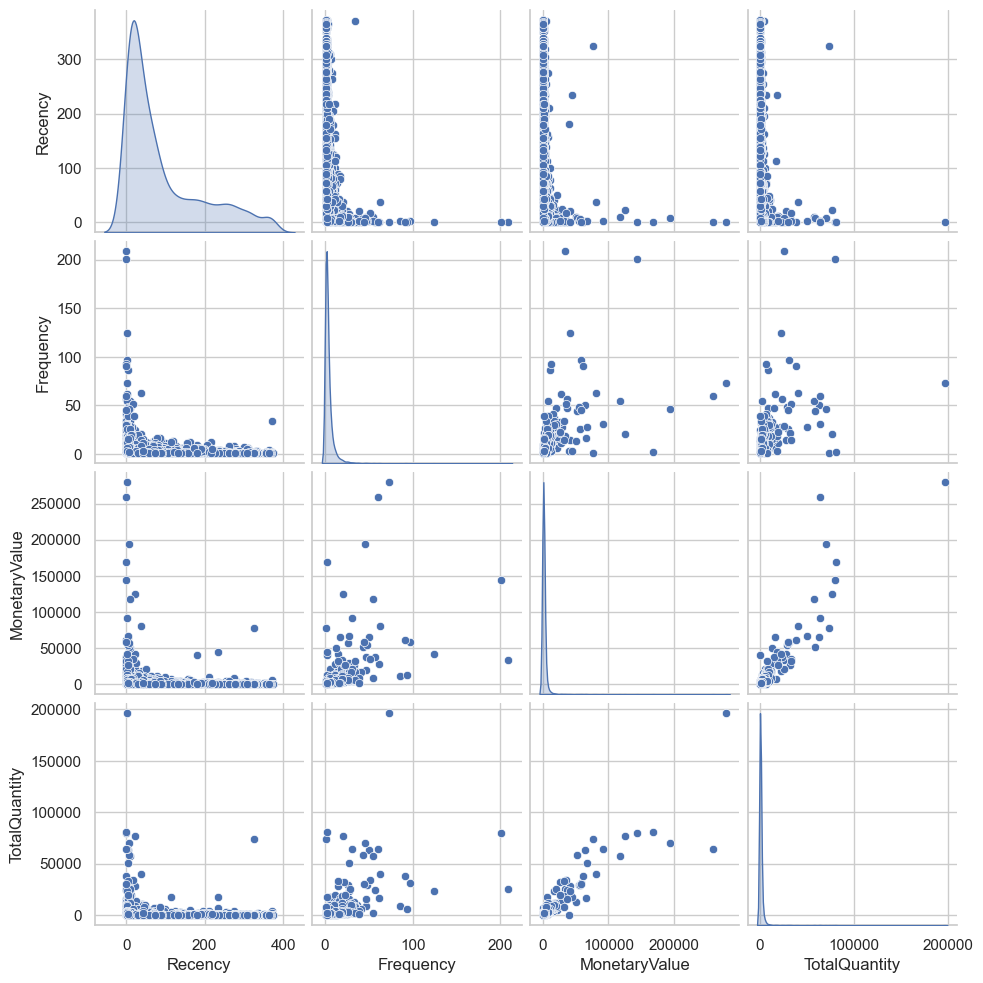

In [7]:
sns.pairplot(
    customer_df[["Recency", "Frequency", "MonetaryValue", "TotalQuantity"]],
    diag_kind="kde"
)
plt.show()


Correlation Heatmap

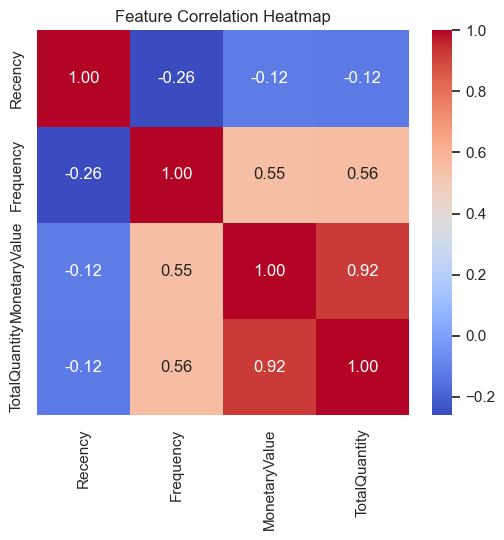

In [8]:
plt.figure(figsize=(6,5))
sns.heatmap(
    customer_df[["Recency", "Frequency", "MonetaryValue", "TotalQuantity"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature Correlation Heatmap")
plt.show()


Boxplots

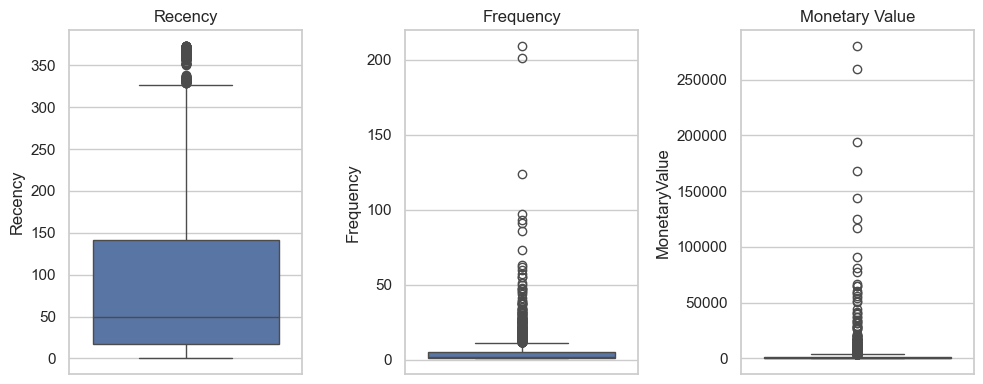

In [9]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.boxplot(y=customer_df["Recency"])
plt.title("Recency")

plt.subplot(1,3,2)
sns.boxplot(y=customer_df["Frequency"])
plt.title("Frequency")

plt.subplot(1,3,3)
sns.boxplot(y=customer_df["MonetaryValue"])
plt.title("Monetary Value")

plt.tight_layout()
plt.show()
